# <center> LOGISTIC REGRESSION </center>

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("dataset.csv");
df

,PM2.5,PM10,NO2,SO2,O3,AQI
0,104.00,148.50,23.00,15.30,117.62,3.0
1,94.50,142.00,16.25,17.00,136.23,3.0
2,82.75,126.50,14.83,15.40,149.92,3.0
3,68.50,117.00,13.60,21.80,161.70,3.0
4,69.25,112.25,11.80,21.38,161.68,3.0
...,...,...,...,...,...,...
129272,12.75,45.00,17.20,10.82,45.80,5.0
129273,10.75,36.75,17.75,4.38,50.73,4.0
129274,15.75,30.25,13.75,2.90,41.55,4.0
129275,14.00,29.50,20.70,7.12,39.23,4.0


### Split data into training and test sets

In [2]:
X=df[['PM2.5','PM10','NO2','SO2','O3']]
y=df[['AQI']]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LOGISTIC REGRESSION

In [4]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4583462252475248


In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[  51,  374,    8,  187,    1,    0],
       [ 122,  837,   94,  981,    1,    0],
       [  31,  570,   89, 2181,   42,    0],
       [  32,  528,  177, 8694,  832,    0],
       [   5,  113,   73, 5614, 2178,    5],
       [   0,    2,    4,  657, 1371,    2]], dtype=int64)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.21      0.08      0.12       621
         1.0       0.35      0.41      0.38      2035
         2.0       0.20      0.03      0.05      2913
         3.0       0.47      0.85      0.61     10263
         4.0       0.49      0.27      0.35      7988
         5.0       0.29      0.00      0.00      2036

    accuracy                           0.46     25856
   macro avg       0.33      0.27      0.25     25856
weighted avg       0.42      0.46      0.39     25856



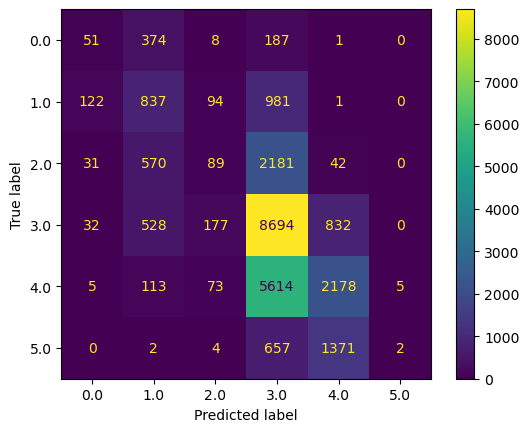

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=lr_model.classes_)
disp.plot()